<a href="https://colab.research.google.com/github/aydawudu/IAX/blob/main/WeightPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weight Prediction
#### CHAPTER 01: _Interpretation, Interpretability, and Explainability; and why does it all matter?_
##### From **Interpretable Machine Learning with Python 2nd Edition** by Serg Masís, published by Packt

## The Preparations

### Installing the Libraries

None need to be installed in Colab to run this example

### Loading the Libraries

In [ ]:
import math
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

## Understanding a Simple Weight Prediction Model

### Loading and Preparing the Data

**Load Webpage & Extract Content into DataFrame**

In [ ]:
url = 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights'

height_weight_df = pd.read_html(url)[1][['Height(Inches)','Weight(Pounds)']]

**Count Records**

In [ ]:
num_records = len(height_weight_df)
print(num_records)

200


**Place in x and y variables**

In [ ]:
x = height_weight_df['Height(Inches)'].values.reshape(num_records, 1)
y = height_weight_df['Weight(Pounds)'].values.reshape(num_records, 1)

### Fitting a Linear Regression Model

**Fit Model**

In [ ]:
model = linear_model.LinearRegression().fit(x,y)

**Generate Equation**

In [ ]:
print("ŷ = " + str(model.intercept_[0]) + " + " + str(model.coef_.T[0][0]) + " x₁")

ŷ = -106.02770644878137 + 3.4326761292716297 x₁


**Compute Mean Absolute Error**

In [ ]:
y_pred = model.predict(x)
mae = mean_absolute_error(y, y_pred)
print(mae)

7.7587373803882205


**Plot Regression Line ± Error**

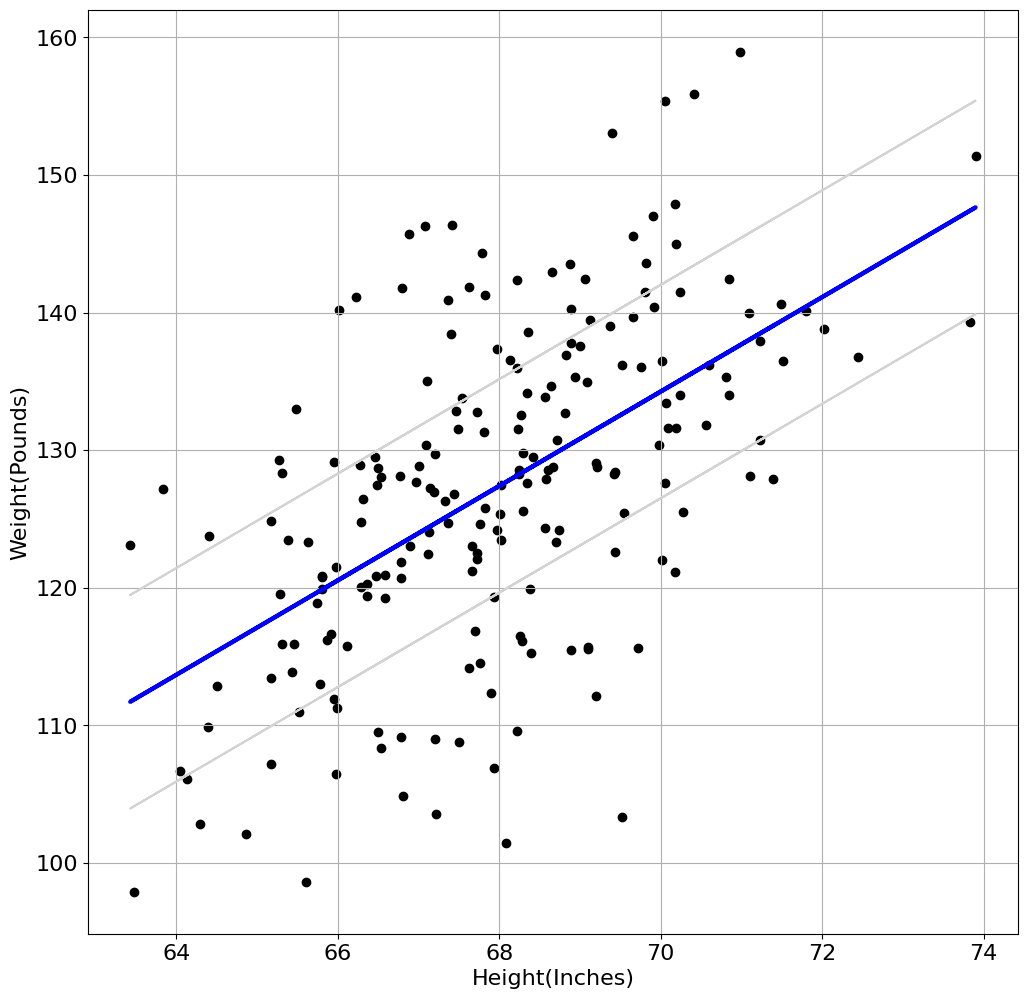

In [ ]:
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 16})
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.plot(x, y_pred + mae, color='lightgray')
plt.plot(x, y_pred - mae, color='lightgray')
plt.title('')
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.grid(True)
plt.show()

**Calculate Pearsons Correlation Coefficient**

In [ ]:
corr, pval = pearsonr(x[:,0], y[:,0])
print(corr)

0.5568647346122995


**Two-tailed p-value**

In [ ]:
print(pval < 0.05)

True


In [ ]:
print(datetime.now().strftime('%Y-%m-%d %H:%M:%S')) #TODO: REMOVE CELL

2023-10-01 16:08:20
